# Data Visualisation

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_cleaned = pd.read_csv('cleaned_movies_dataset.csv')

# Display information about the cleaned dataset
df_cleaned.info()
df_cleaned.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874 entries, 0 to 873
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                874 non-null    object 
 1   sentiment_scores    874 non-null    object 
 2   favorability        874 non-null    float64
 3   rating              874 non-null    object 
 4   genre               874 non-null    object 
 5   year                874 non-null    int64  
 6   released            874 non-null    object 
 7   votes               874 non-null    float64
 8   director            874 non-null    object 
 9   writer              874 non-null    object 
 10  star                874 non-null    object 
 11  country             874 non-null    object 
 12  budget              874 non-null    float64
 13  gross               874 non-null    float64
 14  company             874 non-null    object 
 15  runtime             874 non-null    float64
 16  positive

,favorability,year,votes,budget,gross,runtime,positive_sentiment,neutral_sentiment,negative_sentiment,success
count,874.000000,874.000000,8.740000e+02,8.740000e+02,8.740000e+02,874.000000,874.000000,874.000000,874.000000,874.000000
mean,0.679473,2010.638444,1.590659e+05,4.347939e+07,1.273284e+08,109.663616,80.461098,71.123570,38.953089,0.566362
std,0.131310,4.198367,1.832709e+05,4.722442e+07,1.827879e+08,16.791188,39.666005,36.267029,23.979494,0.495860
min,0.000000,2005.000000,3.000000e+03,1.500000e+04,8.315000e+03,75.000000,0.000000,0.000000,0.000000,0.000000
25%,0.612979,2007.000000,4.600000e+04,1.200000e+07,1.913083e+07,97.000000,50.250000,42.250000,20.000000,0.000000
50%,0.691117,2010.000000,9.300000e+04,2.950000e+07,6.158424e+07,107.000000,91.000000,79.000000,39.000000,1.000000
75%,0.760837,2014.000000,2.017500e+05,5.500000e+07,1.569810e+08,119.000000,111.000000,96.000000,55.000000,1.000000
max,1.000000,2019.000000,1.600000e+06,3.000000e+08,1.236005e+09,187.000000,163.000000,212.000000,114.000000,1.000000


# Exploration of Features

## Number of Movies Released in Each Year

year
2005    124
2008     85
2009     84
2017     77
2014     75
2012     73
2015     69
2007     68
2011     65
2006     61
2018     49
2010     21
2013     16
2016      6
2019      1
Name: count, dtype: int64


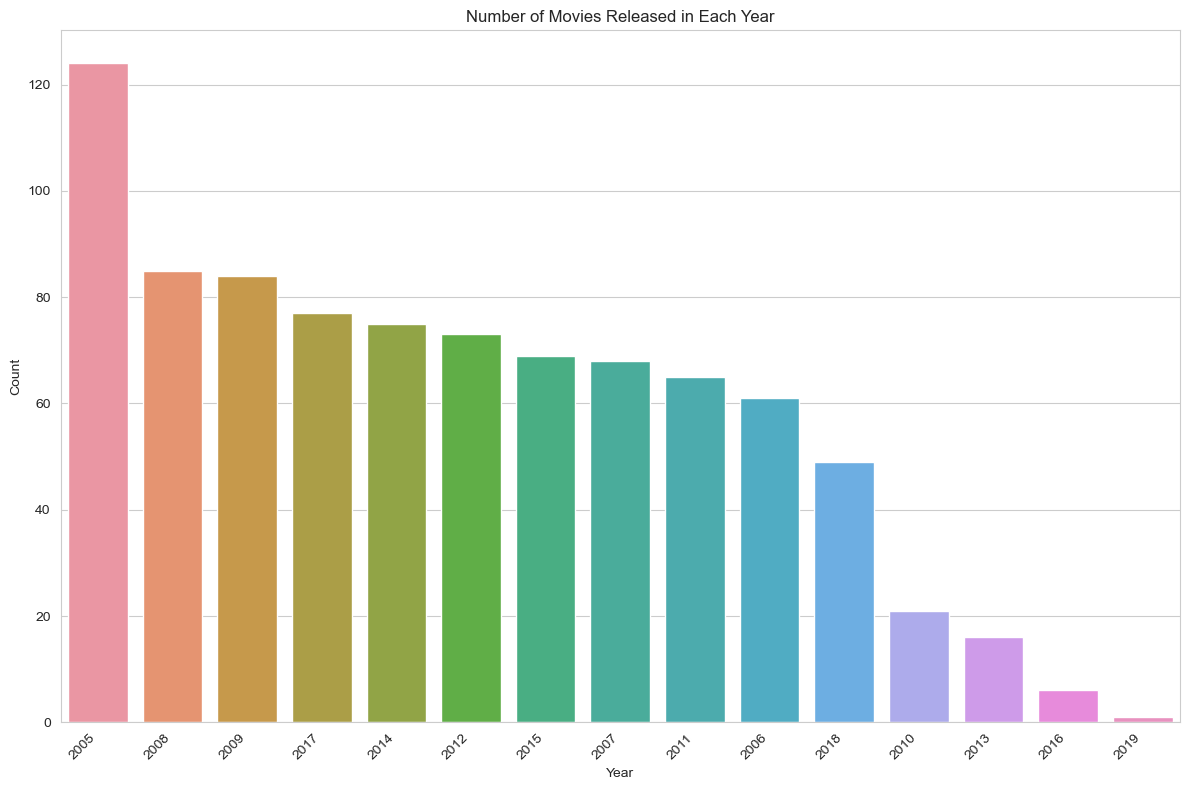

In [70]:
# Calculate the total count for each 
year_counts = df_cleaned['year'].value_counts()
print (year_counts)  # Return the total count for each 
# Create a count plot for the 'year' column to visualize the total number of movies released in each year
plt.figure(figsize=(12, 8))
sns.countplot(x='year', data=df_cleaned, order=df_cleaned['year'].value_counts().index)
plt.title('Number of Movies Released in Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()  # Display the plot

We can see that the movie count for each year is not around the same, which suggests that this data set may not be reliable to use. Using common sense, we know that as the years pass, there will tend to be increasing numbers of movies being made.

Here are some possible reasons for the surge in movie releases in this decade: 
- The 2000s and 2010s witnessed significant advancements in filmmaking technology, particularly in digital cinematography, special effects, and post-production techniques. These technological innovations made it easier and more cost-effective for filmmakers to produce and distribute movies, leading to a surge in the number of releases.
- The rise of digital distribution platforms, such as streaming services and video-on-demand platforms, democratized access to the film industry. Filmmakers no longer had to rely solely on traditional theatrical releases, as they could reach global audiences directly through online platforms. This expanded distribution channels and lowered barriers to entry, facilitating a greater number of movie releases.
- The 2000s and 2010s saw the globalization of the film industry, with Hollywood films gaining widespread popularity in international markets. This globalization led to increased demand for diverse content from audiences worldwide, prompting filmmakers to produce a greater variety of movies to cater to different cultural preferences and tastes.

## Number of Each Type of Genre

genre
Action       257
Comedy       204
Drama        147
Crime         65
Horror        61
Biography     59
Adventure     51
Animation     25
Thriller       1
Mystery        1
Fantasy        1
Sci-Fi         1
Romance        1
Name: count, dtype: int64


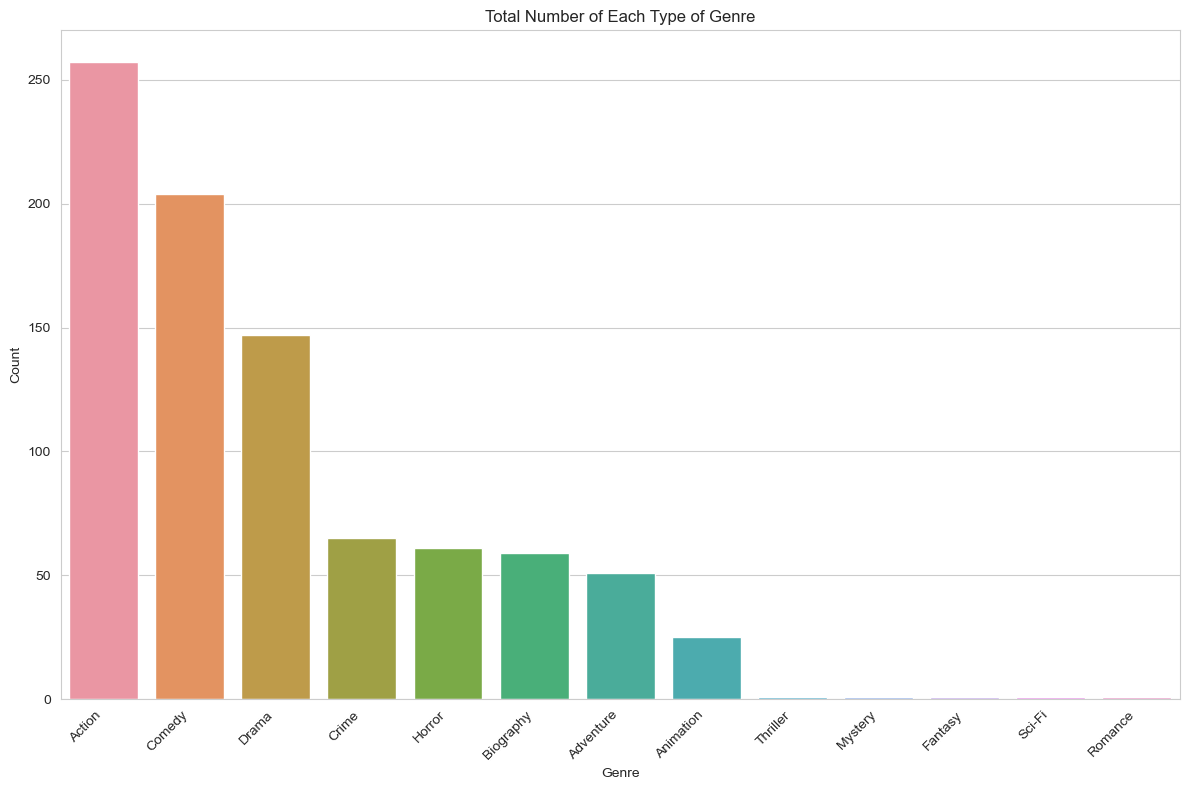

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the total count for each 
genre_counts = df_cleaned['genre'].value_counts()
print (genre_counts)  # Return the total count for each 

# Create a count plot for the 'genre' column to visualize the total number of each type of genre
plt.figure(figsize=(12, 8))
sns.countplot(x='genre', data=df_cleaned, order=df_cleaned['genre'].value_counts().index)
plt.title('Total Number of Each Type of Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()  # Display the plot

Once again, we can see that there are huge differences in the number of available data points for each genre, with Thriller, Mystery, Fantasy, Sci-Fi and Romance having only 1 data point each. This may lead to inaccurate trends later on.

## Number of Each Rating

rating
R          405
PG-13      374
PG          79
Unrated      8
G            5
NC-17        2
Name: count, dtype: int64


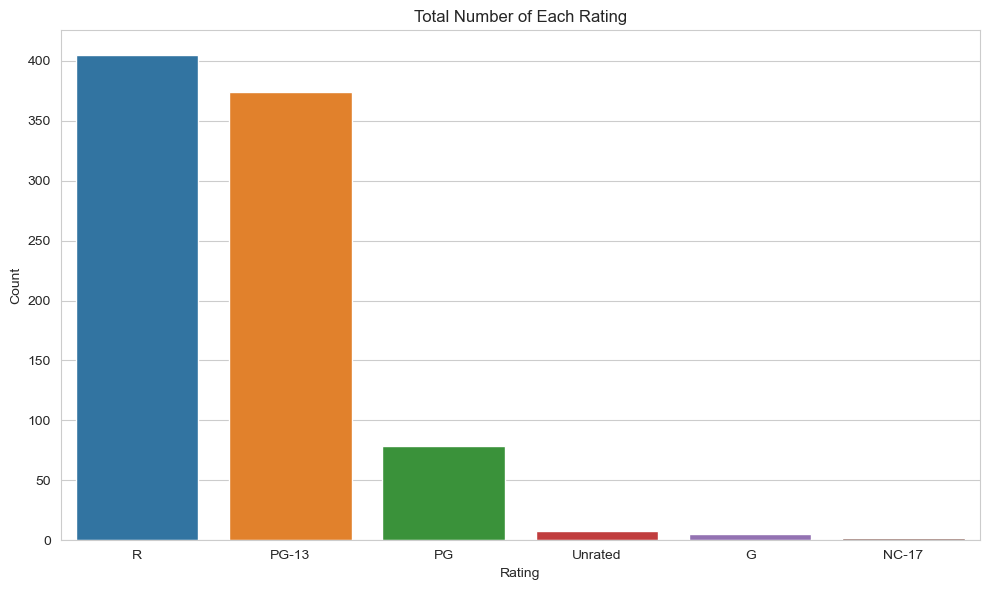

In [72]:
# remove "TV-MA" from dataset since it is not a rating
df_cleaned = df_cleaned[df_cleaned['rating'] != 'TV-MA']

# replace "no rating" with "unrated"
df_cleaned['rating'] = df_cleaned['rating'].replace('Not Rated', 'Unrated')


# Calculate the total count for each rating
rating_counts = df_cleaned['rating'].value_counts()
print(rating_counts)  # Return the total count for each rating

# Create a count plot for the 'rating' column to visualize the total number for each type of rating
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df_cleaned, order=df_cleaned['rating'].value_counts().index)
plt.title('Total Number of Each Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()  # Display the plot

Once again, we can see that there are huge differences in the number of available data points for each rating. This may lead to inaccurate trends later on.

## Country

country
United States           666
United Kingdom           93
France                   26
Canada                   21
Germany                  14
Australia                 6
China                     6
Spain                     5
Czech Republic            4
India                     3
New Zealand               3
Iceland                   2
United Arab Emirates      2
Hong Kong                 2
Ireland                   2
Sweden                    2
Netherlands               2
Norway                    2
Denmark                   2
South Korea               1
Italy                     1
Taiwan                    1
Iran                      1
Indonesia                 1
Austria                   1
Argentina                 1
Chile                     1
Malta                     1
Japan                     1
Name: count, dtype: int64


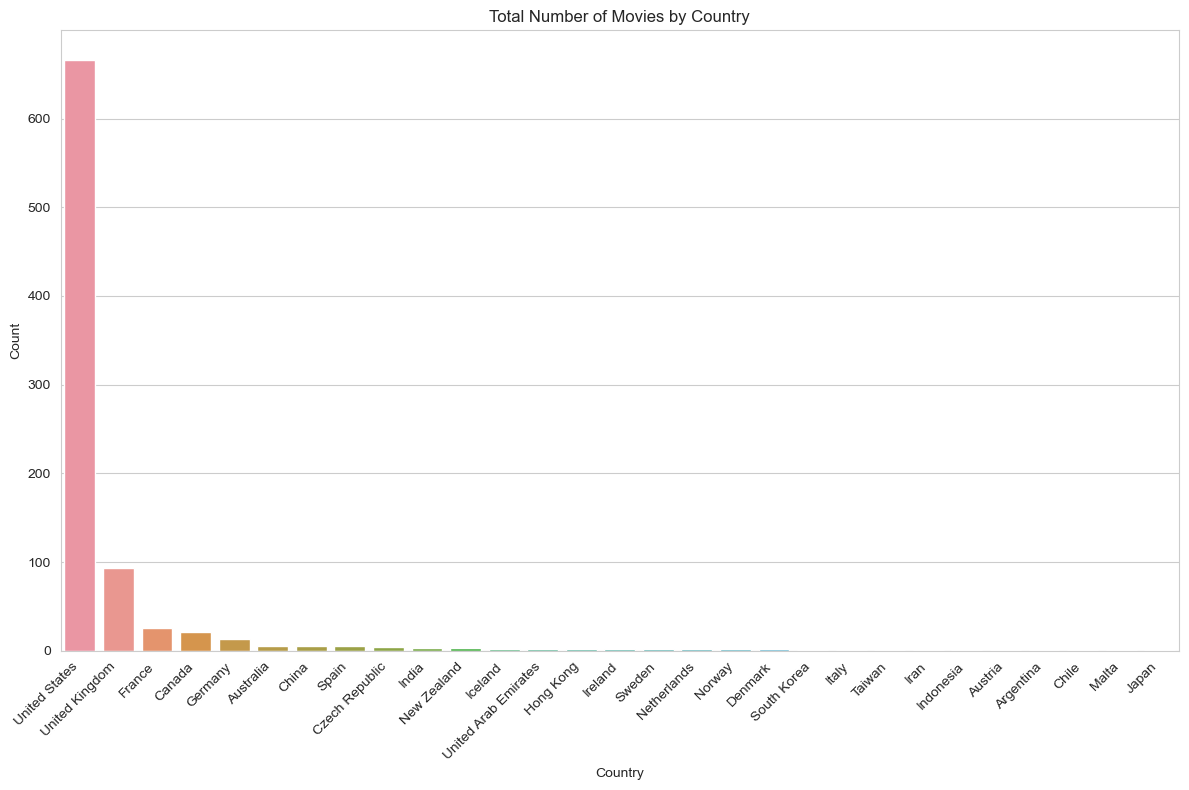

In [73]:
# Calculate the total count for each country
country_counts = df_cleaned['country'].value_counts()
print(country_counts)  # Return the total count for each country
# Create a count plot for the 'country' column to visualize the total number of movies from each country
plt.figure(figsize=(12, 8))
sns.countplot(x='country', data=df_cleaned, order=df_cleaned['country'].value_counts().index)
plt.title('Total Number of Movies by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()  # Display the plot

This dataset does not accurately reflect the aggregate number of movies each country make with respect to others. However, it makes sense that the US and the UK would have the most number of data points gathered, since they make movies in English and English is the most spoken language in the world. Assuming that the creator of this dataset is an English speaker, they would naturally source for movies in English, which will likely originate from either the US or the UK especially since they are one of the biggest countries in the world.

## Company

company
Universal Pictures             65
Columbia Pictures              59
Warner Bros.                   47
Twentieth Century Fox          36
Paramount Pictures             34
                               ..
The American Film Company       1
The Last Picture Company        1
Stacey Testro International     1
Aramid Entertainment Fund       1
Bazelevs Production             1
Name: count, Length: 326, dtype: int64


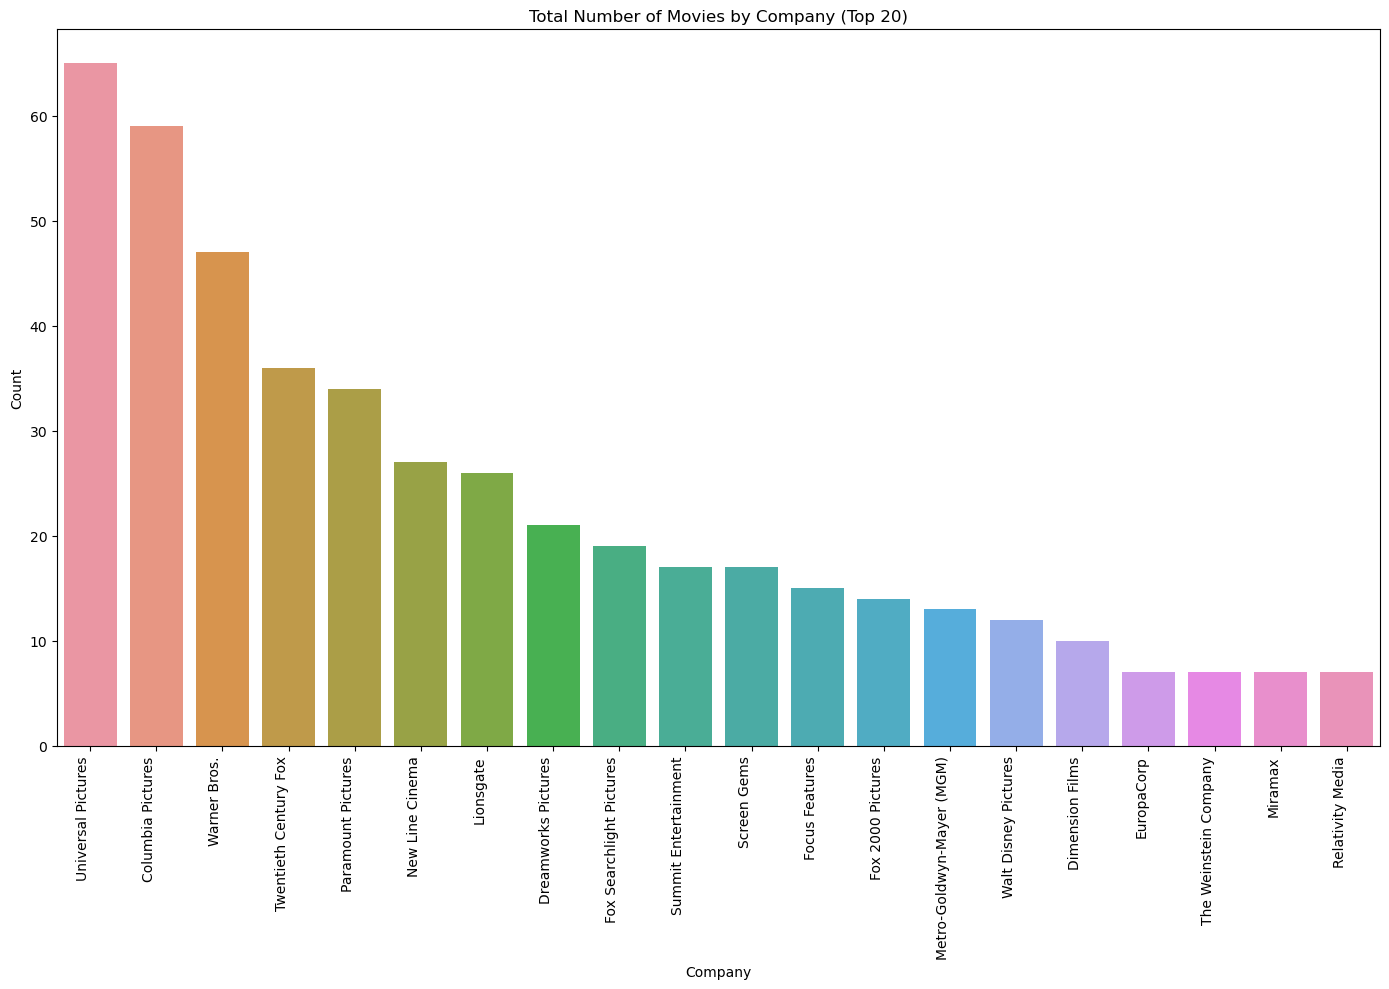

In [22]:
# Calculate the total count for each country
company_counts = df_cleaned['company'].value_counts()
print(company_counts) 
# Create a count plot for the 'company' column to visualize the total number of movies produced by each company
plt.figure(figsize=(14, 10))
sns.countplot(x='company', data=df_cleaned, order=df_cleaned['company'].value_counts().index[:20])  # Top 20 companies
plt.title('Total Number of Movies by Company (Top 20)')
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()  # Display the plot

We should expect the bigger and more well-known companies to have a higher number of movies made, since they will tend to have more successful movies and hence bigger budgets that they can use to make even more movies.

## Writer, Director and Star

{'writer': 699, 'director': 610, 'star': 515}


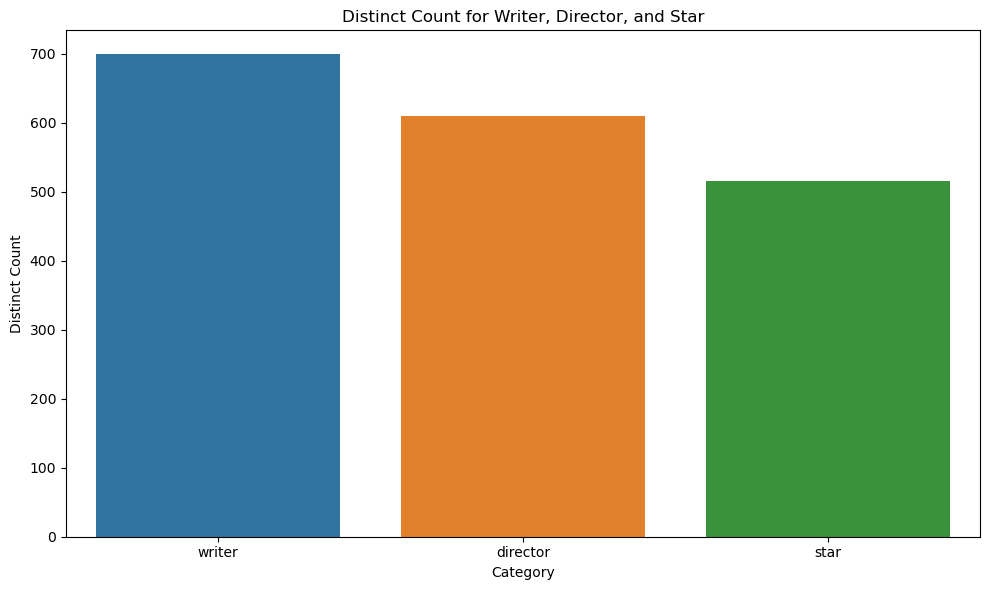

In [23]:
# Calculate the distinct number of values for 'writer', 'director', and 'star'
distinct_counts = {
    'writer': df_cleaned['writer'].nunique(),
    'director': df_cleaned['director'].nunique(),
    'star': df_cleaned['star'].nunique()
}
print (distinct_counts)  # Return the distinct count for each of the specified columns
# Create a bar plot to visualize the distinct counts for 'writer', 'director', and 'star'
plt.figure(figsize=(10, 6))
sns.barplot(x=list(distinct_counts.keys()), y=list(distinct_counts.values()))
plt.title('Distinct Count for Writer, Director, and Star')
plt.xlabel('Category')
plt.ylabel('Distinct Count')
plt.tight_layout()
plt.show()  # Display the plot

## Number of success movies

success
1    495
0    379
Name: count, dtype: int64


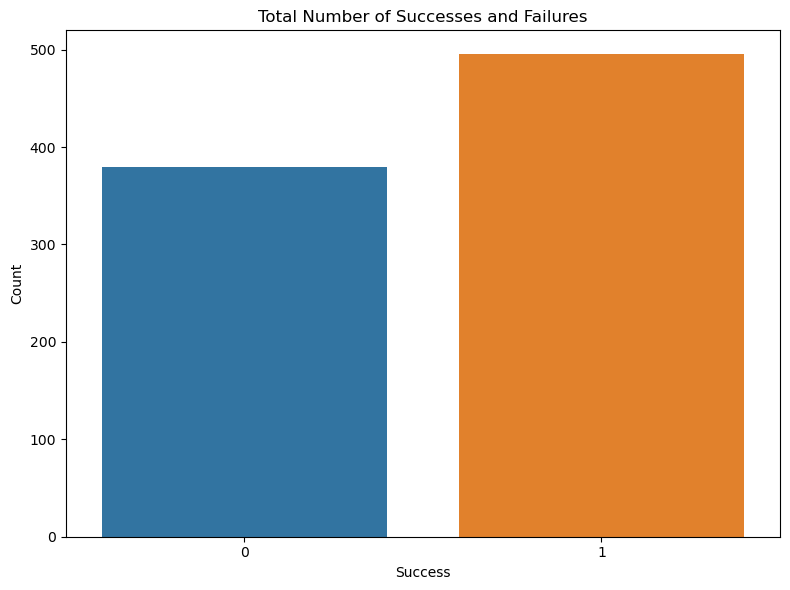

In [24]:
success_counts = df_cleaned['success'].value_counts()
print(success_counts) 
# Create a count plot for the 'success' column to visualize the total number of successes and failures
plt.figure(figsize=(8, 6))
sns.countplot(x='success', data=df_cleaned)
plt.title('Total Number of Successes and Failures')
plt.xlabel('Success')
plt.ylabel('Count')
plt.tight_layout()
plt.show()  # Display the plot

This shows that more than 1 in 2 movies made will become successful, which is a gamble that movie makers will have to take. However, to increase their chances of making a successful movie, they may choose to consider the trends between the factors and gross revenue that are explored later on below.

In [26]:
catVar = pd.DataFrame(df_cleaned[['rating', 'genre', 'star', 'director', 'company']])
variable_levels = catVar.nunique()
print(catVar.nunique())

rating        8
genre        13
star        515
director    610
company     326
dtype: int64


## Distribution of Votes
This shows that most movies have votes fewer than 0.2. The result is clustering around 0. 

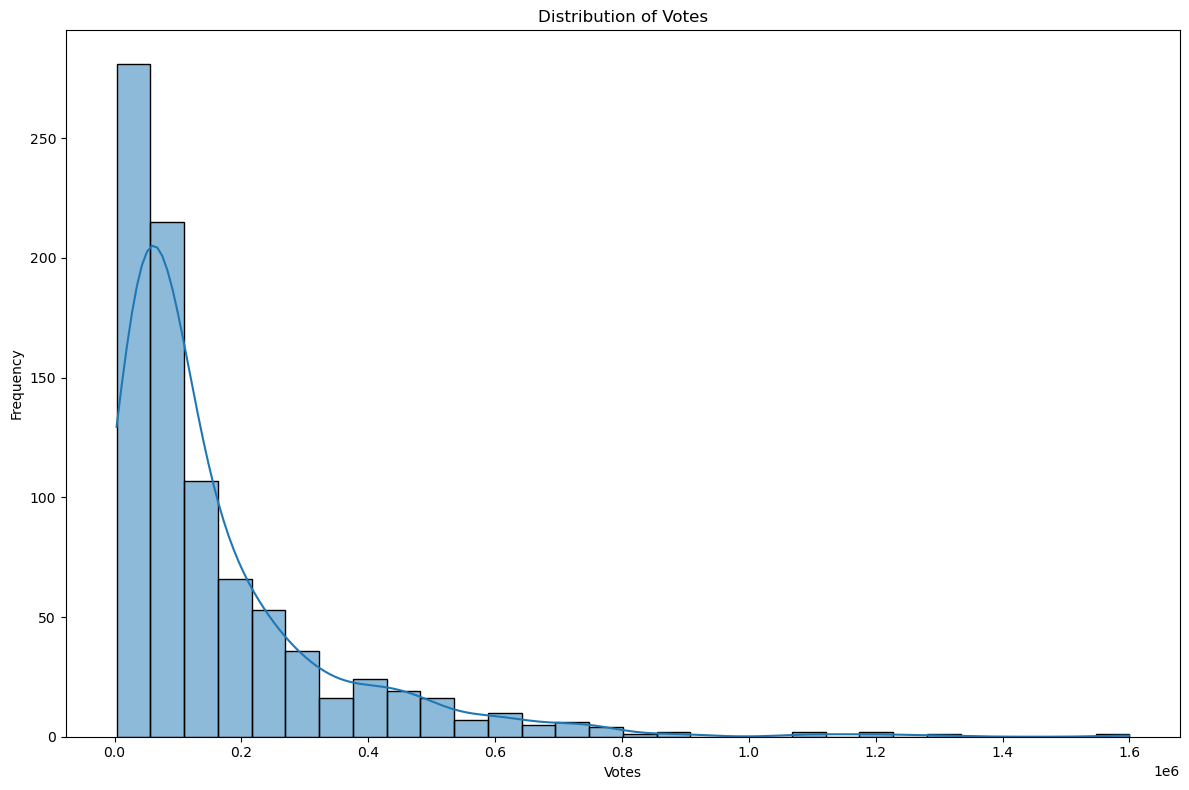

In [27]:
# Plot a histogram to visualize the distribution of votes
plt.figure(figsize=(12, 8))
sns.histplot(df_cleaned['votes'], kde=True, bins=30)
plt.title('Distribution of Votes')
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()  # Display the plot

## Distribution of Budget
This shows that most movie's budget is lower than $5*10^7, indicating that most movie production do not have excessive budget and sponsorship. Most of the movies have the silimar range of budget. 

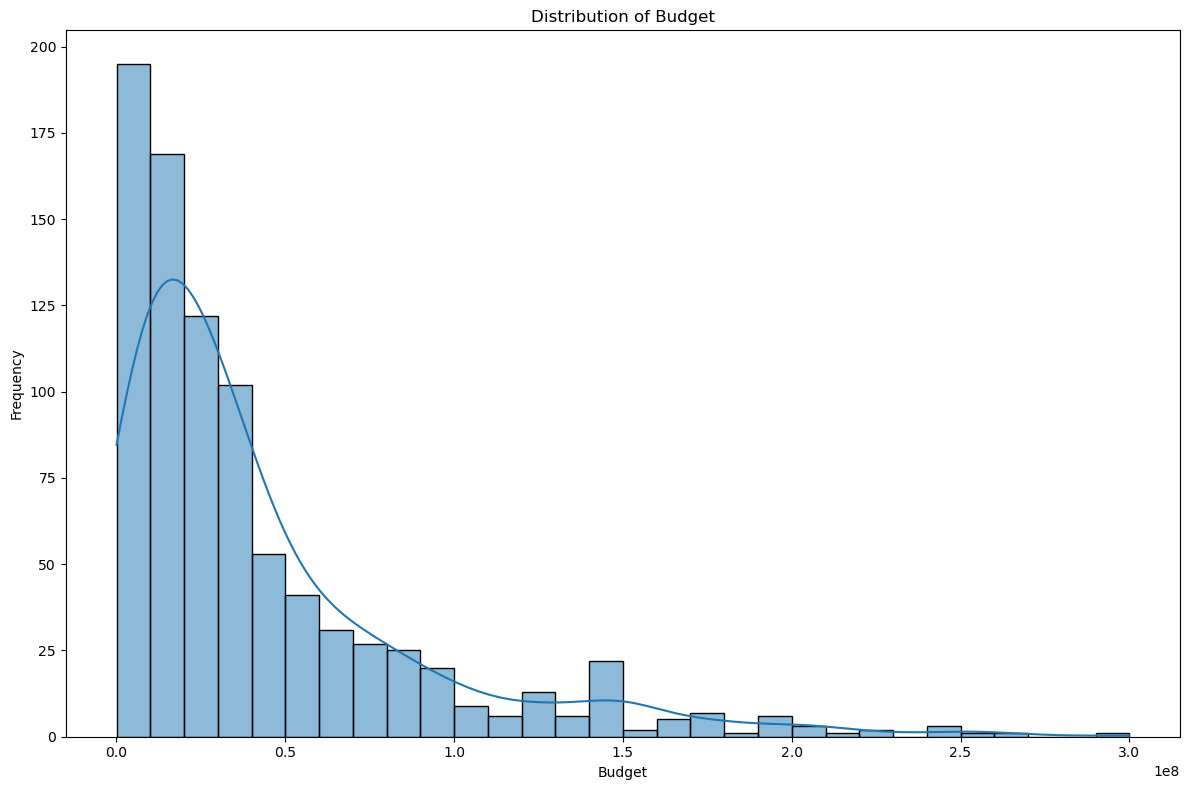

In [28]:
# Plot a histogram to visualize the distribution of budget
plt.figure(figsize=(12, 8))
sns.histplot(df_cleaned['budget'], kde=True, bins=30)
plt.title('Distribution of Budget')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()  # Display the plot

## Distribution of Gross Revenue
This shows that most movies can only generate $4*10^7 revenues, which may not high enough to cover its all spending. Only few movies could be popular enough to generate huge amount of revenue.

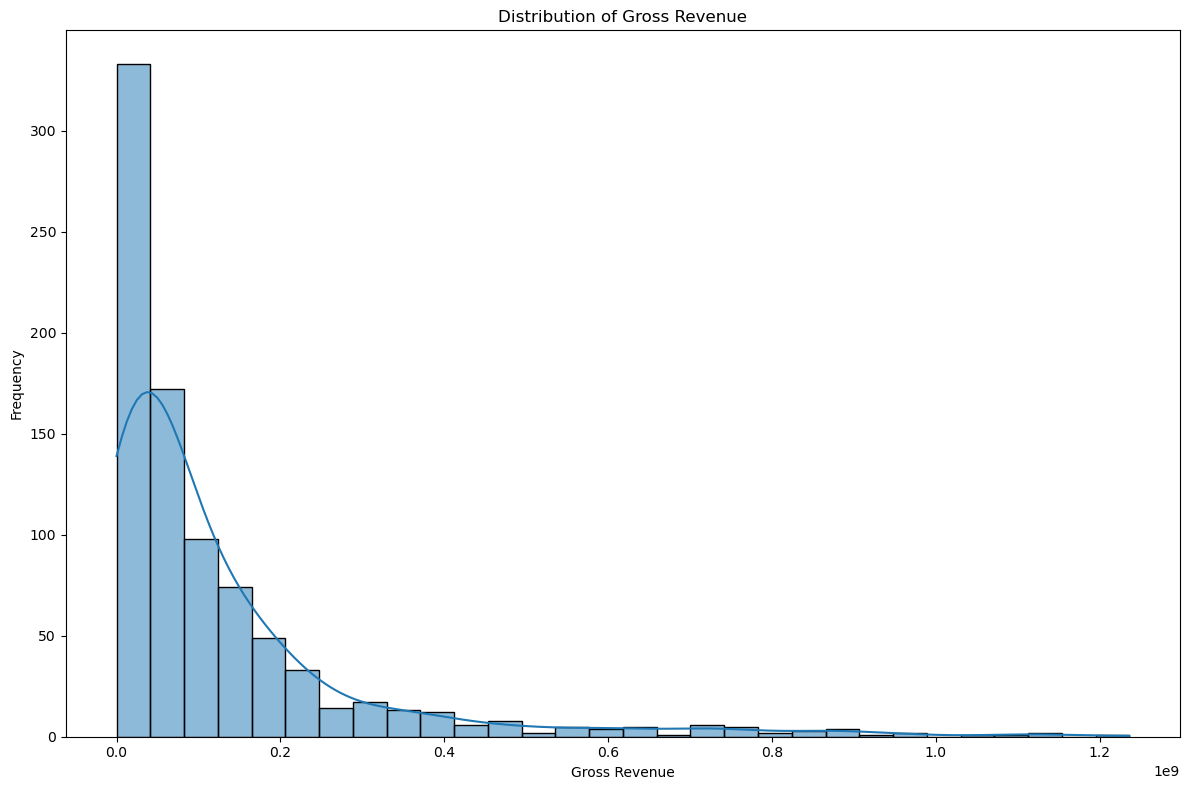

In [29]:
# Plot a histogram to visualize the distribution of gross
plt.figure(figsize=(12, 8))
sns.histplot(df_cleaned['gross'], kde=True, bins=30)
plt.title('Distribution of Gross Revenue')
plt.xlabel('Gross Revenue')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()  # Display the plot

## Distribution of Runtime
The distribution of runtime is nearly normal, suggesting that the mean runtime for movies is about 105-110 minutes. We can see from the graph that the distribution of runtime is relatively packed, suggesting that most movies have similar runtime.

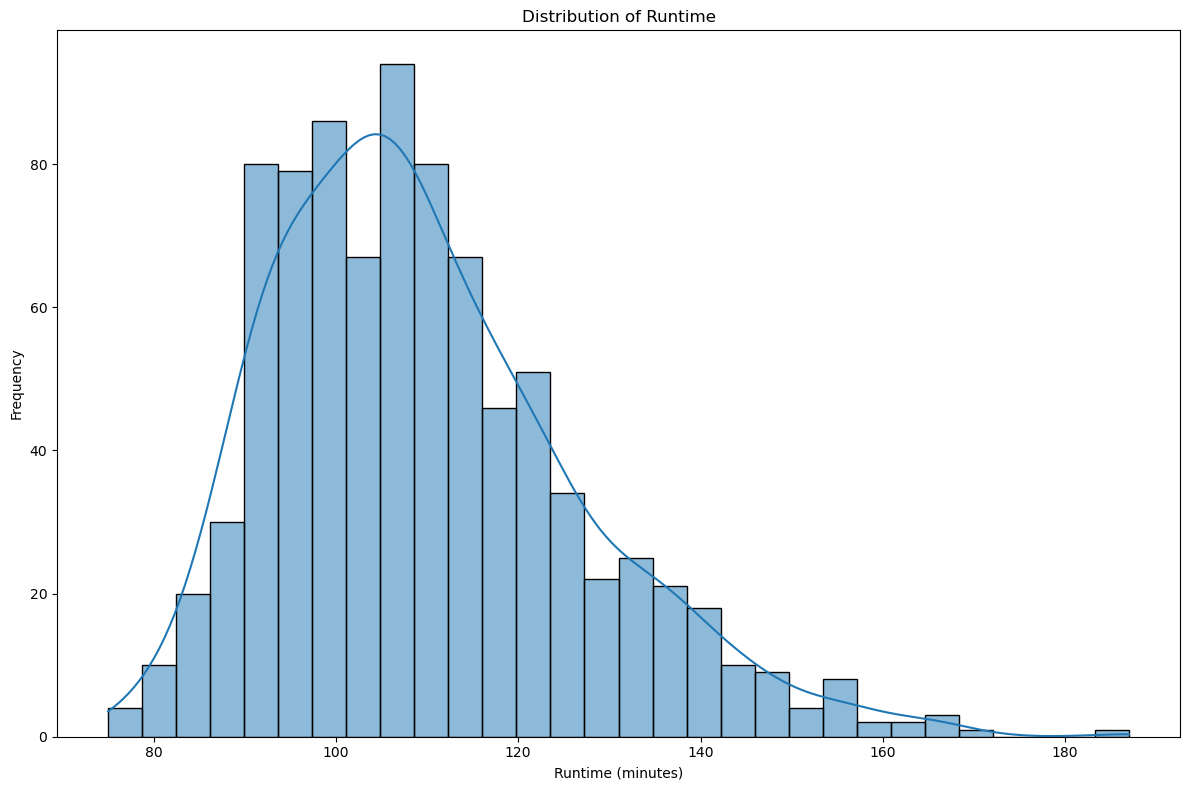

In [30]:
# Plot a histogram to visualize the distribution of runtime
plt.figure(figsize=(12, 8))
sns.histplot(df_cleaned['runtime'], kde=True, bins=30)
plt.title('Distribution of Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()  # Display the plot

## Distribution of Sentiments

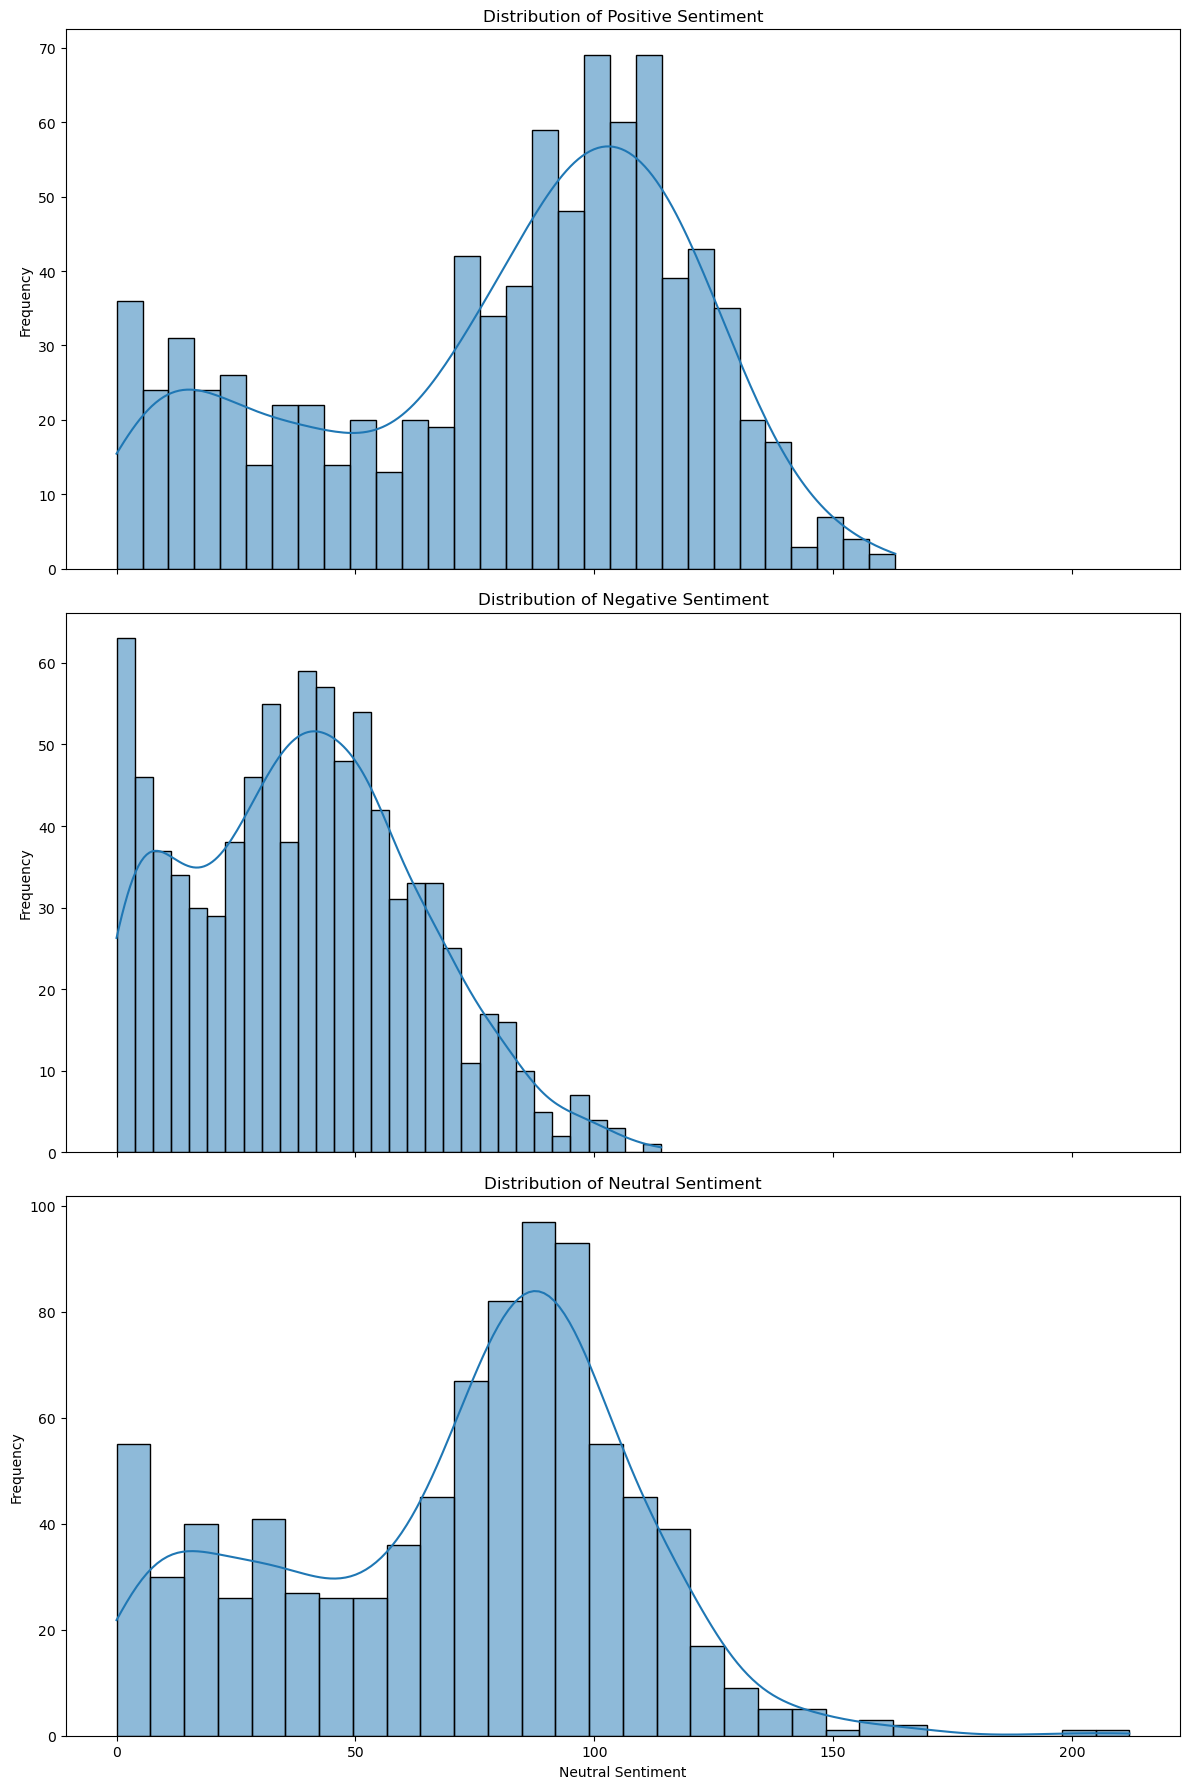

In [31]:
# Create a count plot for 'positive_sentiment', 'negative_sentiment', and 'neutral_sentiment'
fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

# Positive sentiment
sns.histplot(df_cleaned['positive_sentiment'], kde=True, bins=30, ax=axes[0])
axes[0].set_title('Distribution of Positive Sentiment')
axes[0].set_xlabel('Positive Sentiment')
axes[0].set_ylabel('Frequency')

# Negative sentiment
sns.histplot(df_cleaned['negative_sentiment'], kde=True, bins=30, ax=axes[1])
axes[1].set_title('Distribution of Negative Sentiment')
axes[1].set_xlabel('Negative Sentiment')
axes[1].set_ylabel('Frequency')

# Neutral sentiment
sns.histplot(df_cleaned['neutral_sentiment'], kde=True, bins=30, ax=axes[2])
axes[2].set_title('Distribution of Neutral Sentiment')
axes[2].set_xlabel('Neutral Sentiment')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()  # Display the plot

## Distribution of Favorability

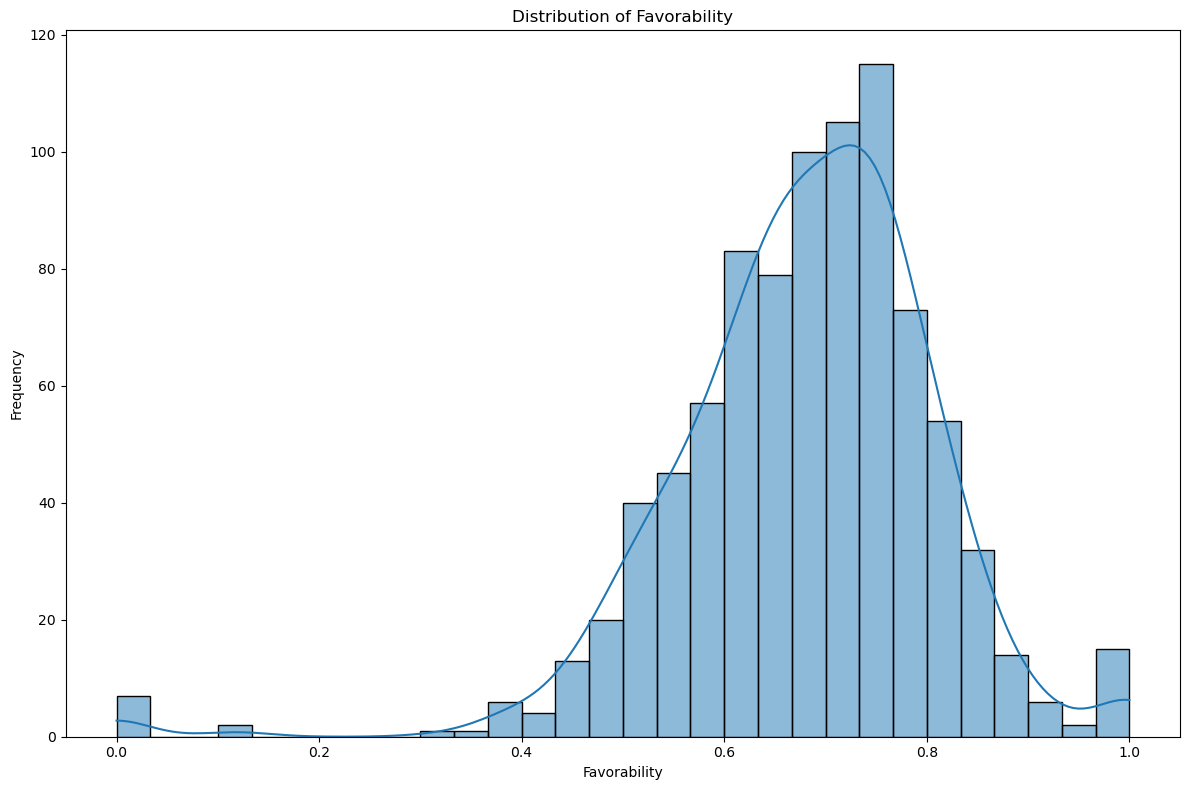

In [32]:
# Plot a histogram to visualize the distribution of favorability
plt.figure(figsize=(12, 8))
sns.histplot(df_cleaned['favorability'], kde=True, bins=30)
plt.title('Distribution of Favorability')
plt.xlabel('Favorability')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()  # Display the plot

# Correlation Matrix of Numerical Features
The correlation matrix reveals the relationships between numerical features such as favorability, budget, gross, votes, runtime, and sentiment counts (positive_sentiment, neutral_sentiment, negative_sentiment). 

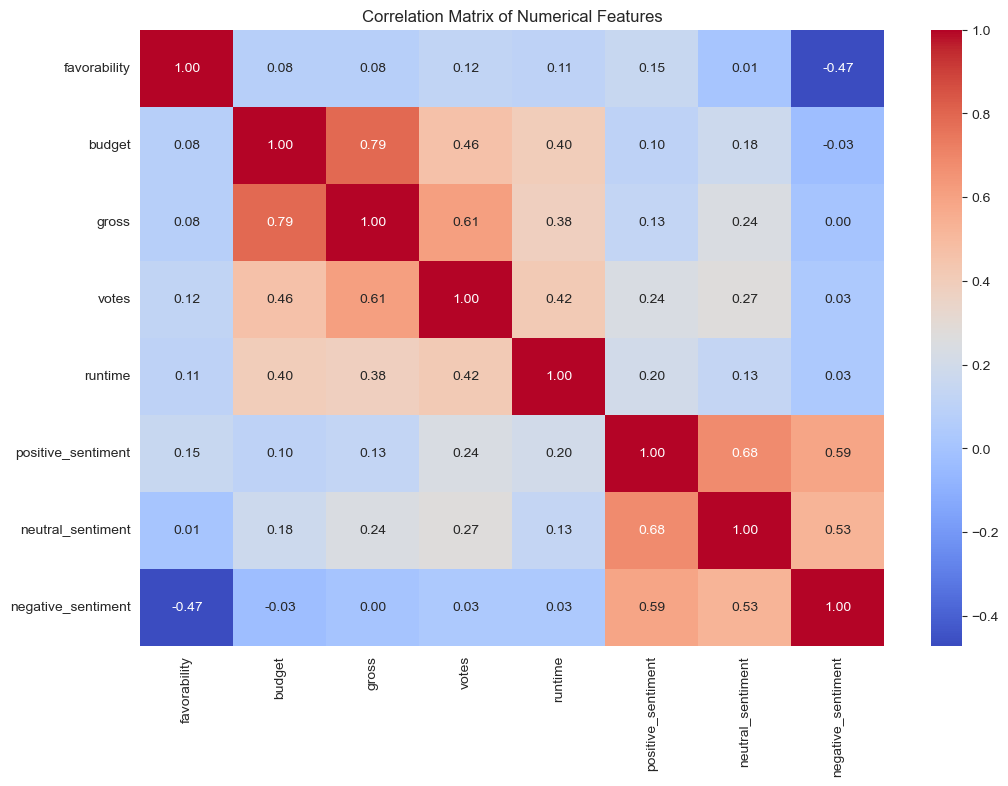

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Exploratory Data Analysis / Visualization

# Correlation heatmap to understand the relationships between numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = df_cleaned[['favorability', 'budget', 'gross', 'votes', 'runtime', 'positive_sentiment', 'neutral_sentiment', 'negative_sentiment']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Notably, gross revenue shows a positive correlation with budget and votes with a correlation of 0.79 and 0.61 respectively, indicating that movies with higher budgets and more votes tend to have higher gross revenue. 

On the other hand, there seems to be little or weak correlation between gross revnue and other factors such as favorability (0.08) and runtime (0.38), since the correlation is below 0.5. In particular, favorability is surprising since one would expect a movie that is more favoured by the public to generate higher revenue, since there will be more support.

However, it's worth noting that low linear correlation does not rule out the possibility of a non-linear relationship. Therefore, we will explore alternative non-linear models to investigate this further.

# Gross Revenue Analysis

## Budget vs Gross Revenue

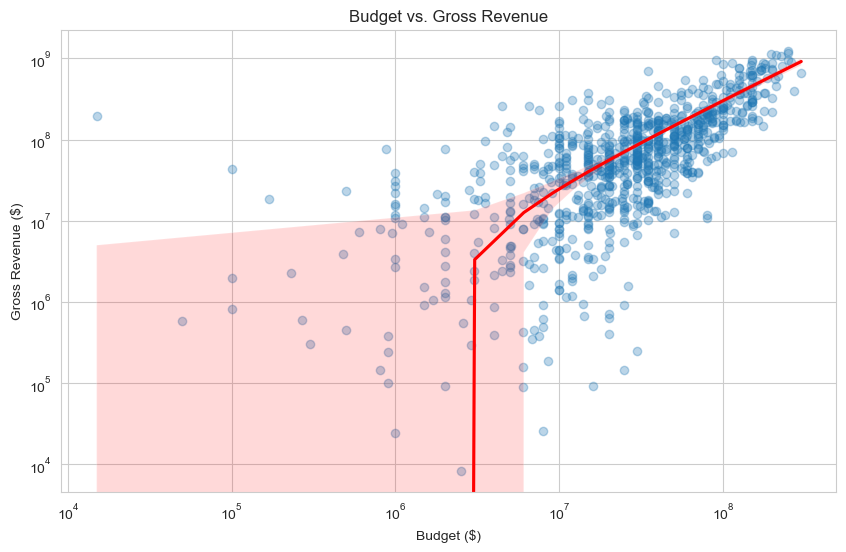

In [34]:
# Scatter plot of budget vs. gross revenue
plt.figure(figsize=(10, 6))
sns.regplot(x='budget', y='gross', data=df_cleaned, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title('Budget vs. Gross Revenue')
plt.xlabel('Budget ($)')
plt.ylabel('Gross Revenue ($)')
plt.xscale('log')  # Log scale due to wide range of values
plt.yscale('log')  # Log scale due to wide range of values
plt.show()

The scatter plot with a regression line on a logarithmic scale for both budget and gross revenue suggests a positive relationship between a movie's budget and its gross revenue. Higher-budget movies tend to earn more in gross revenue, but the scatter and spread indicate variability in this relationship, suggesting that while budget is a factor, it's not the only determinant of gross revenue. Movie makers may wish to take this into account before producing a movie, especially if their main goal is to maximise revenue.

## Positive Sentiment vs Gross Revenue

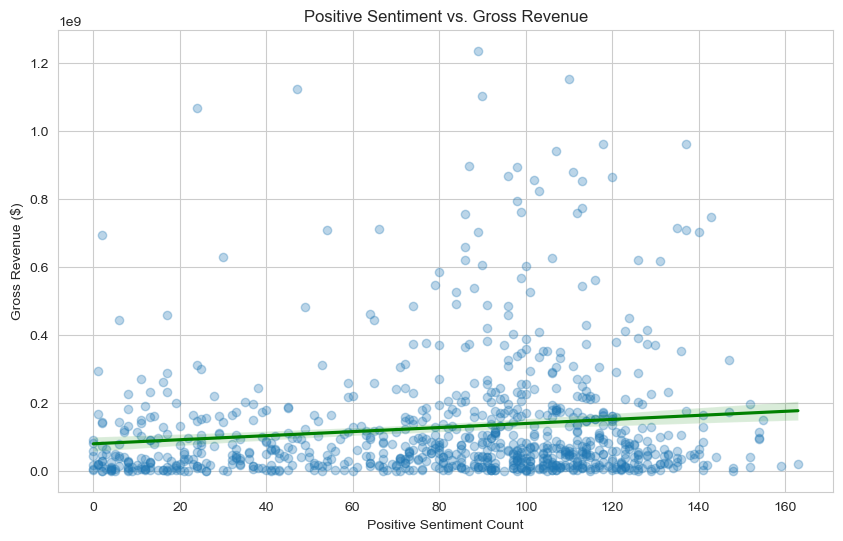

In [35]:
# Scatter plot of positive sentiment vs. gross revenue
plt.figure(figsize=(10, 6))
sns.regplot(x='positive_sentiment', y='gross', data=df_cleaned, scatter_kws={'alpha':0.3}, line_kws={'color': 'green'})
plt.title('Positive Sentiment vs. Gross Revenue')
plt.xlabel('Positive Sentiment Count')
plt.ylabel('Gross Revenue ($)')
plt.show()

The plot of positive_sentiment against gross revenue, also with a regression line, suggests a less pronounced but still visible positive relationship. Movies with a higher count of positive sentiments tend to have higher gross revenue. However, the scatter indicates that the relationship is not as strong or direct as that between budget and gross revenue, implying other factors are also at play in determining a movie's financial success.


## Rating vs Gross Revenue 

In [68]:
print(df_cleaned['rating'].unique())
print(df_cleaned["rating"].dropna().value_counts())

['PG-13' 'R' 'PG' 'G' 'Unrated' 'NC-17']
rating
R          405
PG-13      374
PG          79
Unrated      8
G            5
NC-17        2
Name: count, dtype: int64


Median revenue for 'Unrated' rating: $3518984.00 million
Median revenue for 'R' rating: $38390020.00 million
Median revenue for 'NC-17' rating: $43107841.00 million
Median revenue for 'PG-13' rating: $94935068.00 million
Median revenue for 'PG' rating: $105647102.00 million
Median revenue for 'G' rating: $169333034.00 million


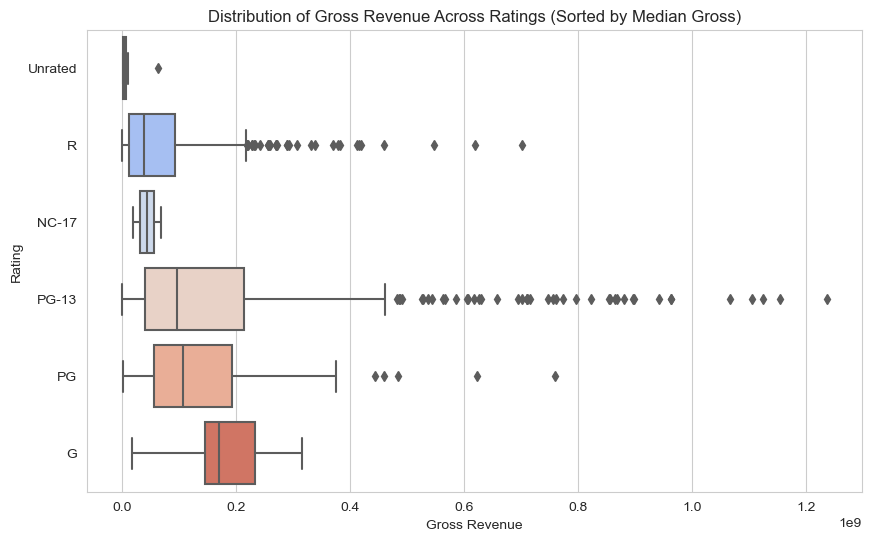

In [62]:
# Calculate median gross revenue for each rating category
median_gross_by_rating = df_cleaned.groupby('rating')['gross'].median()

# Sort ratings in ascending order of median gross
median_gross_by_rating_sorted = median_gross_by_rating.sort_values()

# Extract the sorted order of ratings
sorted_ratings = median_gross_by_rating_sorted.index

# Plotting the boxplots with ratings ordered by median gross revenue
plt.figure(figsize=(10, 6))
sns.boxplot(x='gross', y='rating', data=df_cleaned, palette='coolwarm', order=sorted_ratings)
plt.title('Distribution of Gross Revenue Across Ratings (Sorted by Median Gross)')
plt.xlabel('Gross Revenue')
plt.ylabel('Rating')

# Display median revenue for each rating
for rating in sorted_ratings:
    median_revenue = median_gross_by_rating[rating]
    print(f"Median revenue for '{rating}' rating: ${median_revenue:.2f} million")

plt.show()

As we can see from the above boxplot, there is a clear relation between rating and gross revenue.

Gross revenue increases in the following order above.

Although the highest/lowest value for favorability differs greatly between ratings, this may be attributed to the huge difference in the number of data points available per rating as seen above. Naturally, more data points would lead to a greater variation in data. R and PG-13 have the most number of data points (405 and 374), whereas NC-17, G and Unrated have the least (2, 5 and 8). This corresponds to the difference in the highest/lowest favorability of each rating, with PG-13 having the largest difference and Unrated with the smallest.

## Genres vs Gross Revenue 

In [63]:
print(df_cleaned['genre'].unique())
print()

genre_counts = df_cleaned['genre'].value_counts()
print(genre_counts)

['Adventure' 'Comedy' 'Drama' 'Action' 'Crime' 'Horror' 'Thriller'
 'Biography' 'Animation' 'Mystery' 'Fantasy' 'Sci-Fi' 'Romance']

genre
Action       257
Comedy       204
Drama        146
Crime         65
Horror        61
Biography     59
Adventure     51
Animation     25
Thriller       1
Mystery        1
Fantasy        1
Sci-Fi         1
Romance        1
Name: count, dtype: int64


Median revenue for 'Drama' genre: $33780737.00 million
Median revenue for 'Biography' genre: $41387687.00 million
Median revenue for 'Crime' genre: $49332692.00 million
Median revenue for 'Comedy' genre: $52280006.00 million
Median revenue for 'Horror' genre: $57197876.00 million
Median revenue for 'Adventure' genre: $70595464.00 million
Median revenue for 'Thriller' genre: $96258201.00 million
Median revenue for 'Action' genre: $122444772.00 million
Median revenue for 'Romance' genre: $127869379.00 million
Median revenue for 'Fantasy' genre: $132963417.00 million
Median revenue for 'Sci-Fi' genre: $161849455.00 million
Median revenue for 'Animation' genre: $196393745.00 million
Median revenue for 'Mystery' genre: $760006945.00 million


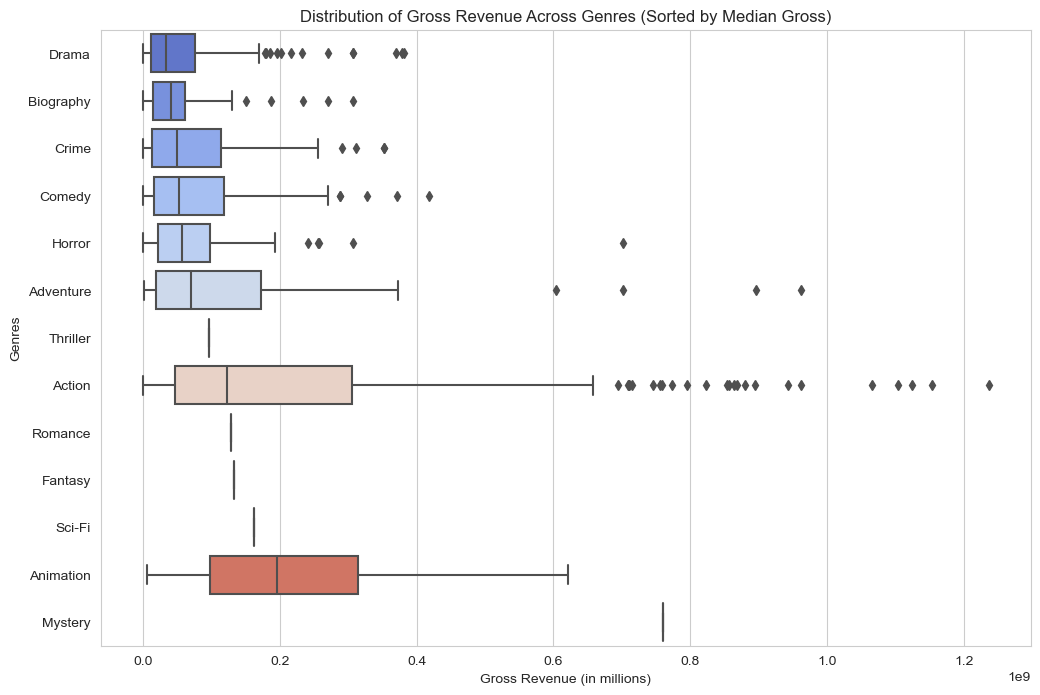

In [59]:
# Calculate median gross revenue for each genre category
median_gross_by_genre = df_cleaned.groupby('genre')['gross'].median()

# Sort genres in ascending order of median gross
median_gross_by_genre_sorted = median_gross_by_genre.sort_values()

# Extract the sorted order of genres
sorted_genres = median_gross_by_genre_sorted.index

# Plotting the boxplots with genres ordered by median gross revenue
plt.figure(figsize=(12, 8))
sns.boxplot(x='gross', y='genre', data=df_cleaned, palette='coolwarm', order=sorted_genres)
plt.title('Distribution of Gross Revenue Across Genres (Sorted by Median Gross)')
plt.xlabel('Gross Revenue (in millions)')
plt.ylabel('Genres')

# Display median revenue for each genre
for genre in sorted_genres:
    median_revenue = median_gross_by_genre[genre]
    print(f"Median revenue for '{genre}' genre: ${median_revenue:.2f} million")

plt.show()

There are a few genres (Thriller, Mystery, Sci-Fi, Action, Romance) with only 1 data point which greatly lowers the accuracy. However, we can still see a relation between the other genres and gross revenue from the above boxplot.

In particular, Animation appears to have a significantly higher median favorability than other genres. Hence, filmmakers may consider this genre if they are looking to maximise revenue.

Although the highest/lowest value for gross revenue differs greatly between ratings, this may be attributed to the huge difference in the number of data points available per genre as explained above for "rating". 

## Year vs Gross Revenue

In [65]:
print(df_cleaned['year'].unique())
print()

year_counts = df_cleaned['year'].value_counts()
print(year_counts)

[2005 2015 2019 2018 2006 2010 2013 2007 2008 2009 2011 2012 2014 2016
 2017]

year
2005    124
2008     85
2009     84
2017     77
2014     75
2012     73
2015     68
2007     68
2011     65
2006     61
2018     49
2010     21
2013     16
2016      6
2019      1
Name: count, dtype: int64


Median revenue for year 2013: $11714104.50 million
Median revenue for year 2010: $12106921.00 million
Median revenue for year 2019: $14454622.00 million
Median revenue for year 2012: $22187813.00 million
Median revenue for year 2015: $29355203.00 million
Median revenue for year 2009: $39672164.00 million
Median revenue for year 2018: $40466970.00 million
Median revenue for year 2005: $63232084.50 million
Median revenue for year 2006: $77356942.00 million
Median revenue for year 2008: $78094714.00 million
Median revenue for year 2016: $103306578.50 million
Median revenue for year 2007: $130653754.50 million
Median revenue for year 2011: $136515867.00 million
Median revenue for year 2017: $142337240.00 million
Median revenue for year 2014: $172945750.00 million


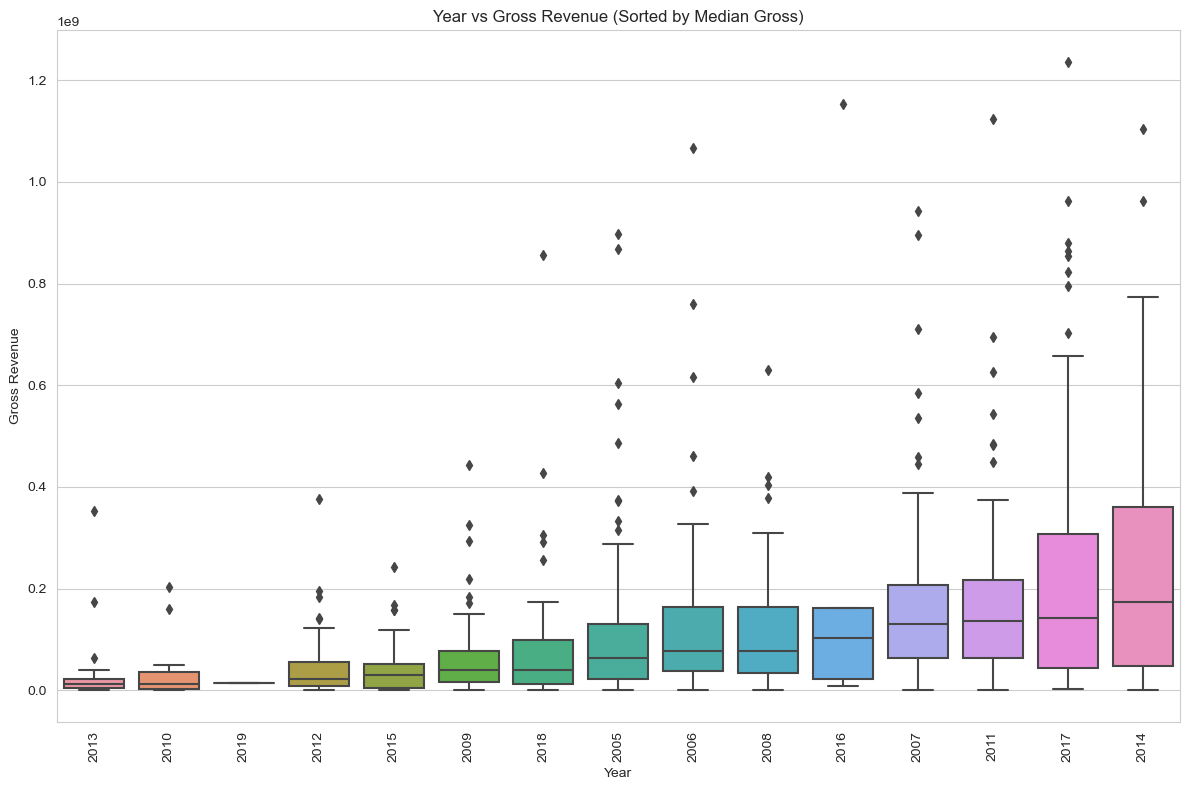

In [49]:
# Calculate median gross revenue for each year
median_gross_by_year = df_cleaned.groupby('year')['gross'].median()

# Sort years in ascending order of median gross
median_gross_by_year_sorted = median_gross_by_year.sort_values()

# Extract the sorted order of years
sorted_years = median_gross_by_year_sorted.index

# Plotting the boxplot with years ordered by median gross revenue
plt.figure(figsize=(12, 8))
sns.boxplot(x='year', y='gross', data=df_cleaned, order=sorted_years)
plt.title('Year vs Gross Revenue (Sorted by Median Gross)')
plt.xlabel('Year')
plt.ylabel('Gross Revenue')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display median revenue for each year
for year in sorted_years:
    median_revenue = median_gross_by_year[year]
    print(f"Median revenue for year {year}: ${median_revenue:.2f} million")

plt.show()

Although we can see which years tend to generate a higher movie revenue, there do not seem to be a relationship between recency of movies and their revenue. However, this may simply be attributed to the uneven numbers of data points available per year. It is notable that 2019 and 2016 have less than 10 data points. To increase the accuracy of such datasets, one should consider getting more data from only the factors that are lacking.

Here are some possible reasons for the rise in movie numbers in this decade:
- The rise of digital distribution platforms, such as streaming services and video-on-demand platforms, democratized access to the film industry. Filmmakers no longer had to rely solely on traditional theatrical releases, as they could reach global audiences directly through online platforms. This expanded distribution channels and lowered barriers to entry, facilitating a greater number of movie releases.
- The 2000s and 2010s saw the globalization of the film industry, with Hollywood films gaining widespread popularity in international markets. This globalization led to increased demand for diverse content from audiences worldwide, prompting filmmakers to produce a greater variety of movies to cater to different cultural preferences and tastes.

## Company vs Gross Revenue

In [66]:
company_value_counts = df_cleaned['company'].value_counts()
first_20_company = company_value_counts.head(20)

print(first_20_company)

company
Universal Pictures           65
Columbia Pictures            59
Warner Bros.                 47
Twentieth Century Fox        36
Paramount Pictures           34
New Line Cinema              27
Lionsgate                    26
Dreamworks Pictures          21
Fox Searchlight Pictures     19
Summit Entertainment         17
Screen Gems                  17
Focus Features               15
Fox 2000 Pictures            14
Metro-Goldwyn-Mayer (MGM)    13
Walt Disney Pictures         12
Dimension Films              10
EuropaCorp                    7
The Weinstein Company         7
Miramax                       7
Relativity Media              7
Name: count, dtype: int64


Median revenue for 'Fox Searchlight Pictures': $39952437.00 million
Median revenue for 'Focus Features': $59389433.00 million
Median revenue for 'Lionsgate': $61645889.00 million
Median revenue for 'Screen Gems': $73830347.00 million
Median revenue for 'Metro-Goldwyn-Mayer (MGM)': $77211836.00 million
Median revenue for 'New Regency Productions': $81996153.50 million
Median revenue for 'Summit Entertainment': $86081711.00 million
Median revenue for 'Universal Pictures': $97984015.00 million
Median revenue for 'EuropaCorp': $108979549.00 million
Median revenue for 'Dreamworks Pictures': $130982129.00 million
Median revenue for 'Fox 2000 Pictures': $139015600.50 million
Median revenue for 'Columbia Pictures': $150166126.00 million
Median revenue for 'New Line Cinema': $155457327.00 million
Median revenue for 'Warner Bros.': $171720398.00 million
Median revenue for 'Paramount Pictures': $175125465.50 million
Median revenue for 'Twentieth Century Fox': $222253837.50 million
Median revenue 

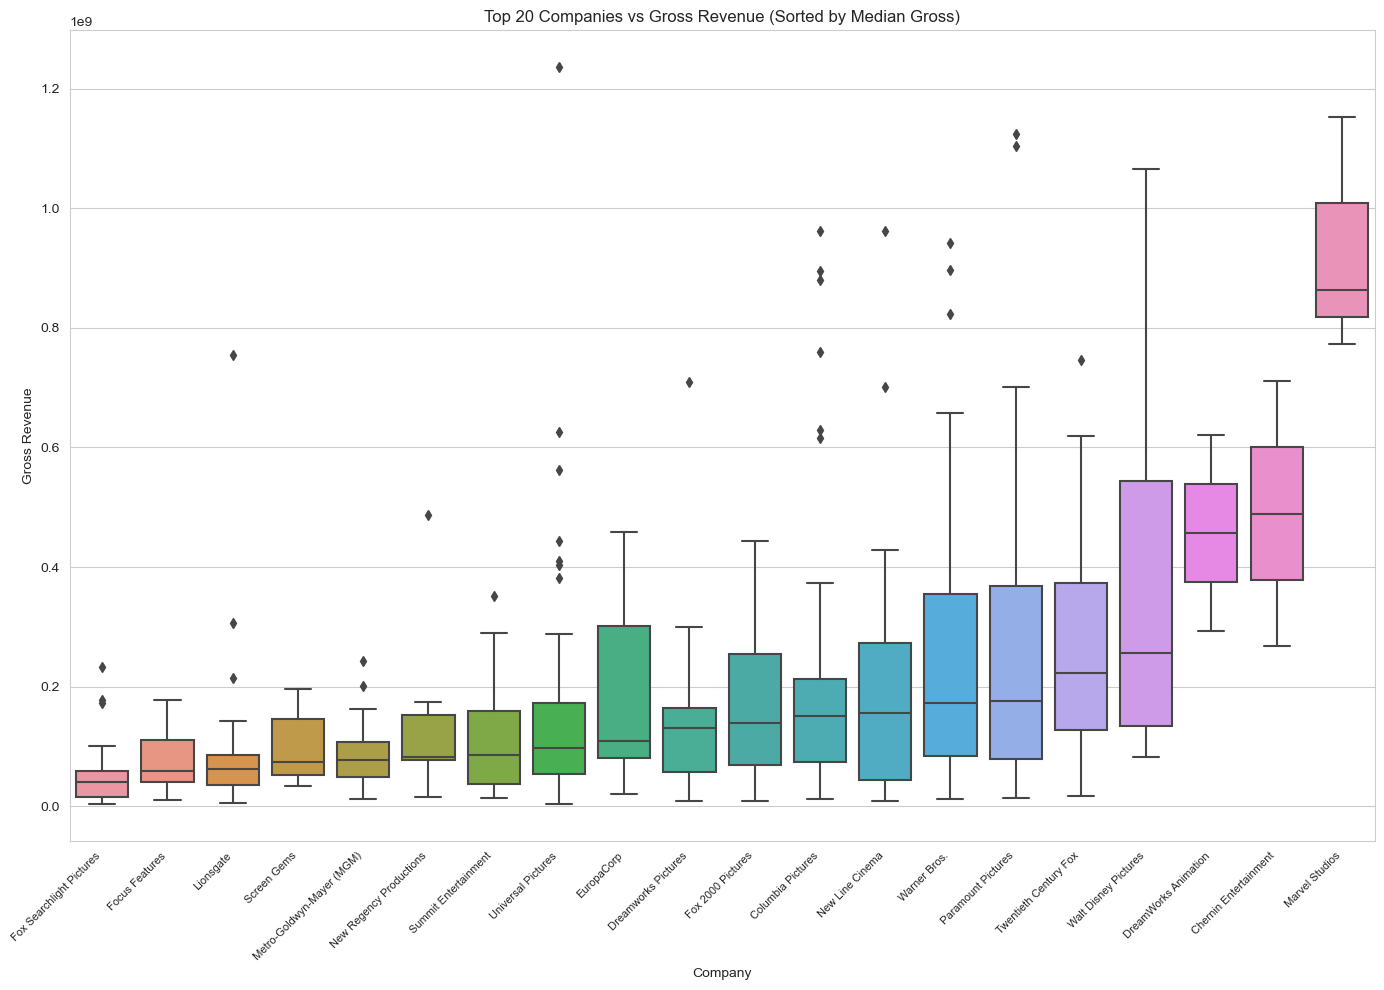

In [55]:
# Calculate the top 20 companies based on their associated gross revenue (sum of gross)
company_top_20_gross = df_cleaned.groupby('company')['gross'].sum().nlargest(20)

# Calculate median gross revenue for each of the top 20 companies
median_gross_by_company = df_cleaned[df_cleaned['company'].isin(company_top_20_gross.index)].groupby('company')['gross'].median()
company_top_20_sorted = median_gross_by_company.sort_values().index

# Plotting the boxplot with the top 20 companies ordered by median gross revenue
plt.figure(figsize=(14, 10))
sns.boxplot(x='company', y='gross', data=df_cleaned[df_cleaned['company'].isin(company_top_20_sorted)], order=company_top_20_sorted)
plt.title('Top 20 Companies vs Gross Revenue (Sorted by Median Gross)')
plt.xlabel('Company')
plt.ylabel('Gross Revenue')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()

# Display median revenue for each of the top 20 companies
for company in company_top_20_sorted:
    median_revenue = median_gross_by_company[company]
    print(f"Median revenue for '{company}': ${median_revenue:.2f} million")

plt.show()

We can clearly see which companies generate the highest revenues. Company name plays a huge role in generating revenue, since people are more likely to watch a movie made by a big/famous company. For example, the Marvel Cinematic Universe (MCU) by Marvel Studios is the most successful movie franchise in history, and people are often eager and waiting for new movies to drop. This correlates to how they have a general gross revenue that is significantly higher than movies made by other companies.

It should also be noted that the number of data points available for each company differs greatly, with the biggest difference being almost 50. Hence, this trend may not be accurate. However, we should also consider that it is not realistic to expect too many data points for each company, since they cannot be making a lot of movies especially for the smaller companies.

## Writer, Director, and Star vs Gross Revenue

In [67]:
writer_value_counts = df_cleaned['writer'].value_counts()
first_20_writer = writer_value_counts.head(20)

print(first_20_writer)
print()

director_value_counts = df_cleaned['director'].value_counts()
first_20_director = director_value_counts.head(20)

print(first_20_director)
print()

star_value_counts = df_cleaned['star'].value_counts()
first_20_star = star_value_counts.head(20)

print(first_20_star)
print()

writer
Luc Besson              7
Ehren Kruger            5
Joel Coen               4
Scott Neustadter        4
Patrick Melton          4
Dan Fogelman            4
Woody Allen             4
Judd Apatow             4
Leigh Whannell          4
Rob Zombie              4
Paul Thomas Anderson    3
Roberto Orci            3
James Gunn              3
Adam Cooper             3
Steven Zaillian         3
Eli Roth                3
Tony Gilroy             3
Simon Kinberg           3
Andrew Niccol           3
John Gatins             3
Name: count, dtype: int64

director
Ridley Scott          7
Steven Soderbergh     6
David Gordon Green    5
Steven Spielberg      5
Michael Bay           5
Joe Wright            5
Eli Roth              4
Matt Reeves           4
D.J. Caruso           4
Woody Allen           4
Brett Ratner          4
Darren Aronofsky      4
Doug Liman            4
Martin Campbell       4
Wes Craven            4
Anne Fletcher         4
Matthew Vaughn        4
Christopher Nolan     4
Rob Z

---- Top 20 Writers (Sorted by Median Gross) ----
Luc Besson: $89083229.00 million
Ehren Kruger: $163995949.00 million
Roberto Orci: $174822325.00 million
Jane Goldman: $410902662.00 million
Akiva Goldsman: $436619011.50 million
Simon Kinberg: $487287646.00 million
Sam Raimi: $492913009.50 million
Jeff Nathanson: $526489282.00 million
Mark Bomback: $600682164.50 million
Christopher Markus: $714421503.00 million
Fran Walsh: $762273157.00 million
James Gunn: $773350147.00 million
Jeff Pinkner: $856085151.00 million
George Lucas: $868390560.00 million
Jonathan Goldstein: $880166924.00 million
Steve Kloves: $896678241.00 million
Michael Goldenberg: $942172396.00 million
Chris McKenna: $962542945.00 million
Ted Elliott: $1066179747.00 million
Gary Scott Thompson: $1236005118.00 million

---- Top 20 Directors (Sorted by Median Gross) ----
Steven Spielberg: $180419231.00 million
Martin Campbell: $182634621.00 million
Jake Kasdan: $216197492.00 million
Ridley Scott: $218122627.00 million
Brett

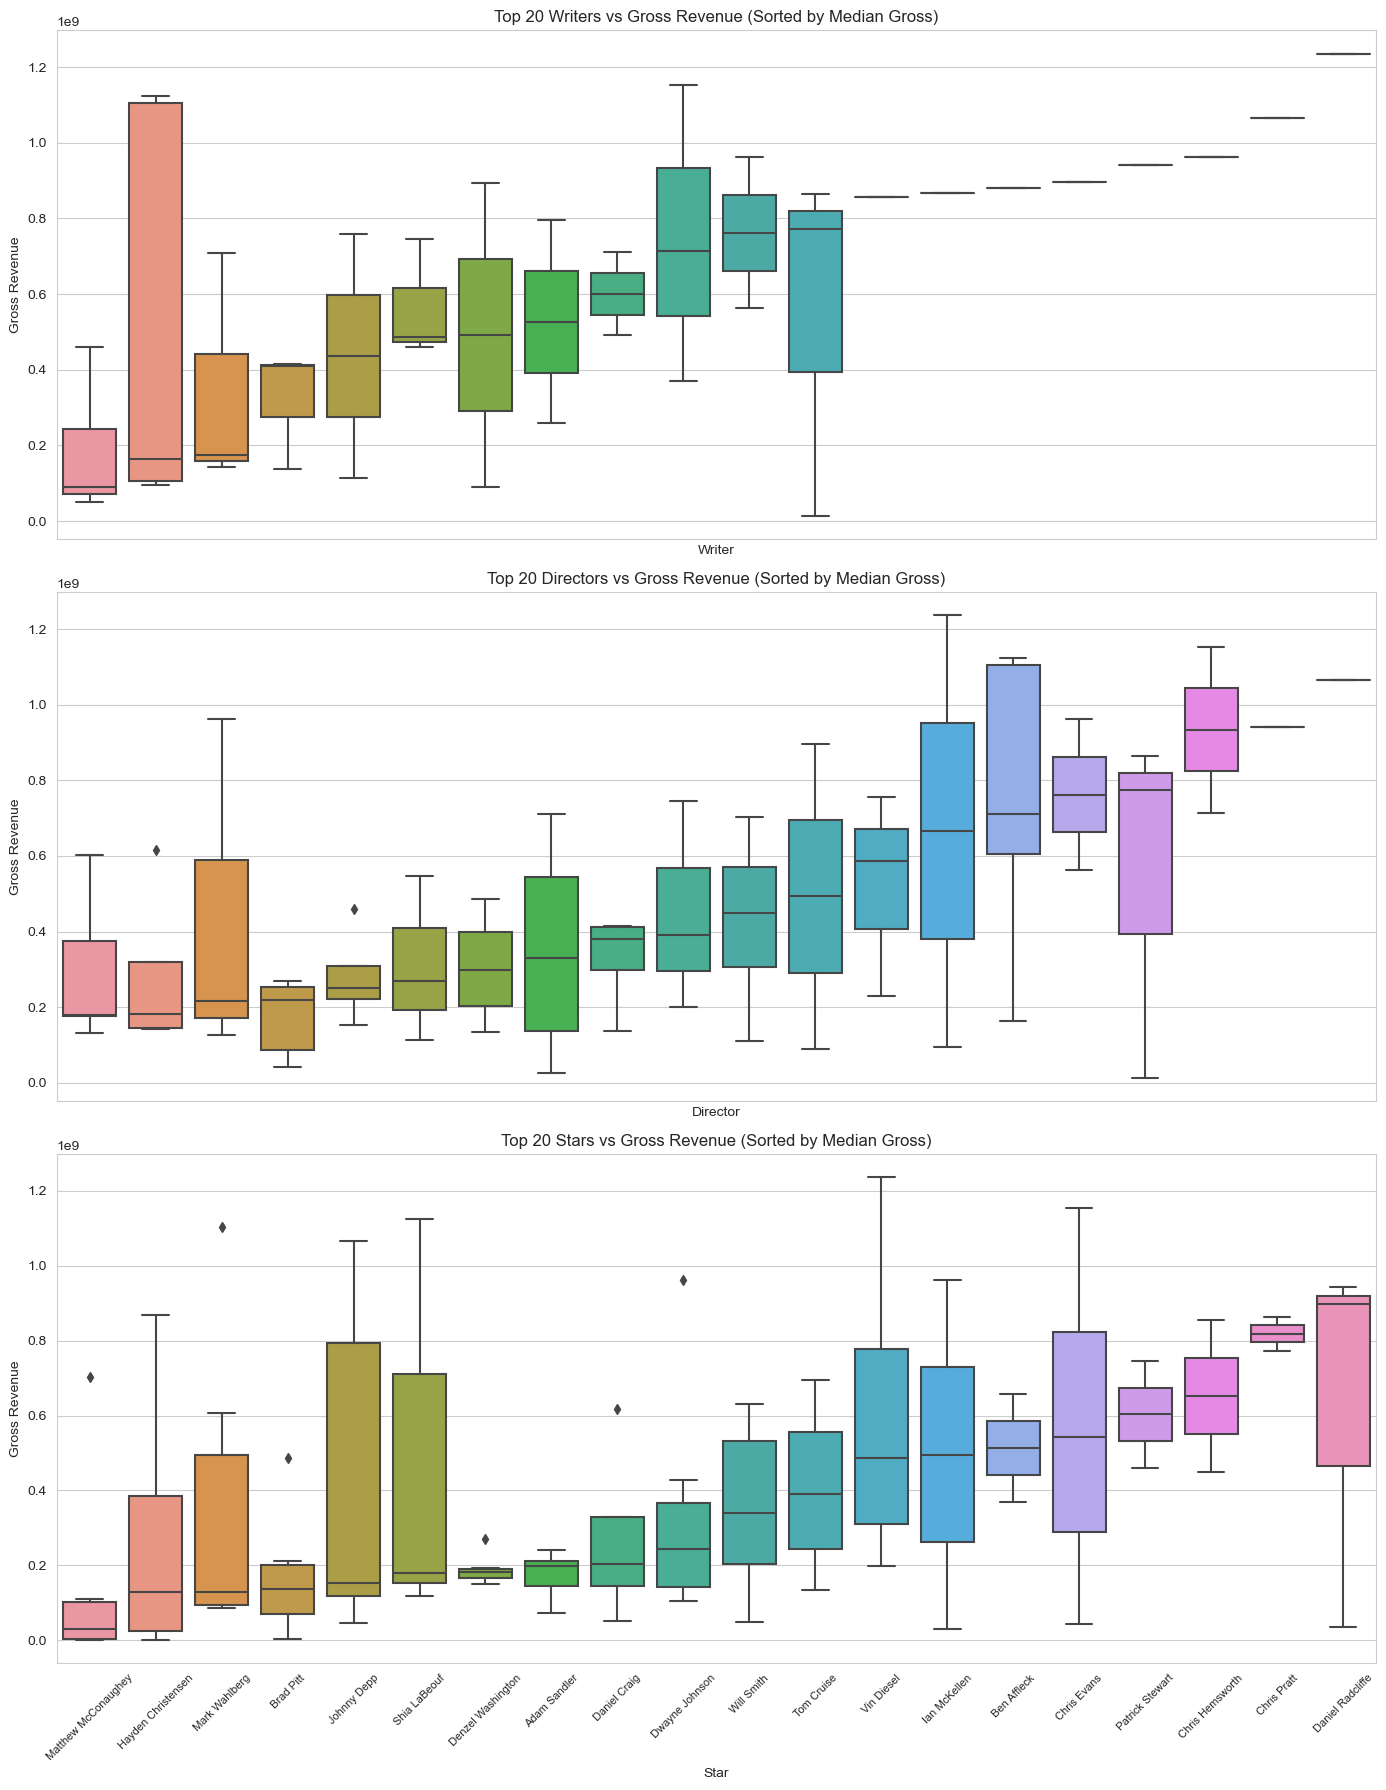

In [56]:
# Filter the data for the top 20 writers, directors, and stars based on gross revenue
top_20_writer = df_cleaned.groupby('writer')['gross'].sum().nlargest(20).index
top_20_director = df_cleaned.groupby('director')['gross'].sum().nlargest(20).index
top_20_star = df_cleaned.groupby('star')['gross'].sum().nlargest(20).index

# Calculate median gross revenue for each category
median_gross_by_writer = df_cleaned[df_cleaned['writer'].isin(top_20_writer)].groupby('writer')['gross'].median()
median_gross_by_director = df_cleaned[df_cleaned['director'].isin(top_20_director)].groupby('director')['gross'].median()
median_gross_by_star = df_cleaned[df_cleaned['star'].isin(top_20_star)].groupby('star')['gross'].median()

# Sort writers, directors, and stars by median gross revenue in ascending order
sorted_writers = median_gross_by_writer.sort_values().index
sorted_directors = median_gross_by_director.sort_values().index
sorted_stars = median_gross_by_star.sort_values().index

# Create subplots for each box plot
fig, axes = plt.subplots(3, 1, figsize=(14, 18), sharex=True)

# Writer vs Gross
sns.boxplot(x='writer', y='gross', data=df_cleaned[df_cleaned['writer'].isin(top_20_writer)], 
            order=sorted_writers, ax=axes[0])
axes[0].set_title('Top 20 Writers vs Gross Revenue (Sorted by Median Gross)')
axes[0].set_xlabel('Writer')
axes[0].set_ylabel('Gross Revenue')
axes[0].tick_params(axis='x', rotation=45, labelsize=8)

# Director vs Gross
sns.boxplot(x='director', y='gross', data=df_cleaned[df_cleaned['director'].isin(top_20_director)], 
            order=sorted_directors, ax=axes[1])
axes[1].set_title('Top 20 Directors vs Gross Revenue (Sorted by Median Gross)')
axes[1].set_xlabel('Director')
axes[1].set_ylabel('Gross Revenue')
axes[1].tick_params(axis='x', rotation=45, labelsize=8)

# Star vs Gross
sns.boxplot(x='star', y='gross', data=df_cleaned[df_cleaned['star'].isin(top_20_star)], 
            order=sorted_stars, ax=axes[2])
axes[2].set_title('Top 20 Stars vs Gross Revenue (Sorted by Median Gross)')
axes[2].set_xlabel('Star')
axes[2].set_ylabel('Gross Revenue')
axes[2].tick_params(axis='x', rotation=45, labelsize=8)

# Display median revenue for each category
for category, sorted_values in [('Writer', sorted_writers), ('Director', sorted_directors), ('Star', sorted_stars)]:
    print(f"---- Top 20 {category}s (Sorted by Median Gross) ----")
    median_gross_by_category = {'Writer': median_gross_by_writer, 'Director': median_gross_by_director, 'Star': median_gross_by_star}[category]
    for name in sorted_values:
        median_revenue = median_gross_by_category[name]
        print(f"{name}: ${median_revenue:.2f} million")
    print()

plt.tight_layout()
plt.show()  # Display the plots

From the above boxplots, we can see which writers/directors/stars generate the highest gross revenues. 

Since the number of available data points for each of these writers/directors/stars differ by <10, this trend is relatively reliable. There are too few data points available to form an accurate conclusion; however, we must also take note that the data points available for all of them will be limited, since writing/directing/starring in tens or hundreds of movie is not realistic. 

But at the same time, filmmakers may still want to take this into consideration since naturally, people are more likely to like a movie that has their favourite stars, writers or producers in it. Hence, this data may be used to find out who should be hired to potentially help boost the gross revenue generated by the movie.

## Favorability vs Success

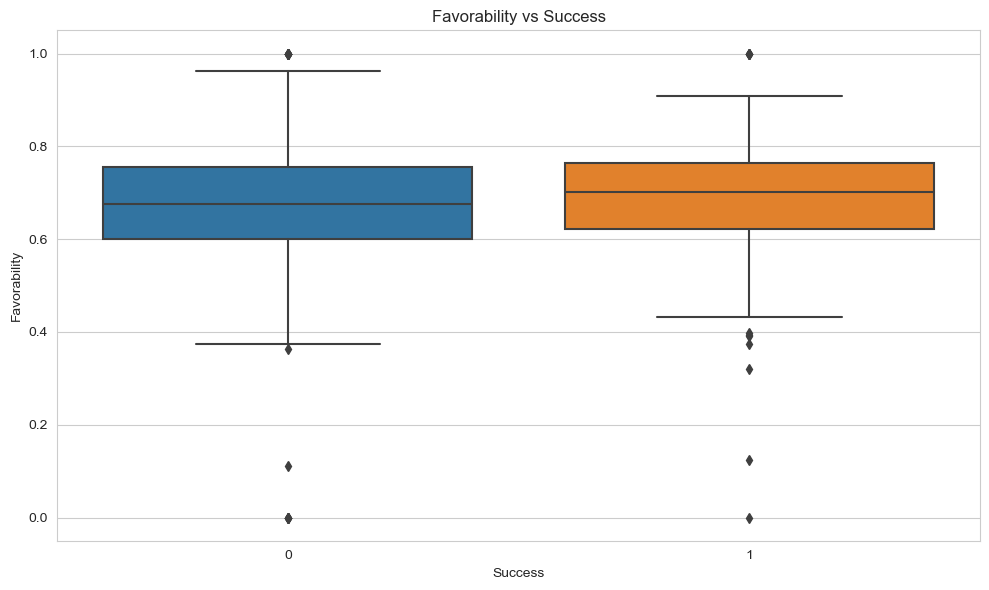

In [57]:
# Create a box plot to visualize the relationship between 'favorability' and 'success'
plt.figure(figsize=(10, 6))
sns.boxplot(x='success', y='favorability', data=df_cleaned)
plt.title('Favorability vs Success')
plt.xlabel('Success')
plt.ylabel('Favorability')
plt.tight_layout()
plt.show()  # Display the plot

As we can see above, the favorability of a movie tends to correspond to its success rate. This makes sense because a favorable movie will have many people watching it, which will help to raise gross revenue and lead to success.